# 판다스 심화과정

In [1]:
import pandas as pd
import numpy as np

# 조건으로 검색하기

Numpy array와 마찬가지로 masking 연산이 가능하다.

In [2]:
# 5행 2열의 데이터프레임을 난수로 생성.
df = pd.DataFrame(np.random.rand(5,2), columns=["A","B"])
df

,A,B
0,0.997954,0.978593
1,0.045840,0.312249
2,0.351037,0.142348
3,0.097777,0.852853
4,0.651998,0.107788


In [3]:
df["A"]<0.5 # A컬럼의 시리즈 데이터 중 0.5보다 큰 데이터를 추출

0    False
1     True
2     True
3     True
4    False
Name: A, dtype: bool

조건에 맞는 DataFrame row를 추출할 수 있다.

In [4]:
df[(df["A"]<0.5) & (df["B"]>0.3)] #둘다 True인 row만 추출

,A,B
1,0.045840,0.312249
3,0.097777,0.852853


In [5]:
df.query("A < 0.5 and B > 0.3") # query메소드를 통해 문장형으로 입력 가능

,A,B
1,0.045840,0.312249
3,0.097777,0.852853


문자열이라면 다른 방식으로도 조건 검색이 가능하다

In [6]:
dict = {"Animal":["Dog","Cat","Cat","Pig","Cat"],
       "Name":["Happy","Sam",'Toby','Mini','Rocky']}

In [7]:
df = pd.DataFrame(dict)
df

,Animal,Name
0,Dog,Happy
1,Cat,Sam
2,Cat,Toby
3,Pig,Mini
4,Cat,Rocky


In [8]:
df["Animal"].str.contains("Cat")

0    False
1     True
2     True
3    False
4     True
Name: Animal, dtype: bool

In [9]:
df.Animal.str.match("Cat")

0    False
1     True
2     True
3    False
4     True
Name: Animal, dtype: bool

In [10]:
df["Animal"]=="Cat"

0    False
1     True
2     True
3    False
4     True
Name: Animal, dtype: bool

함수로 데이터 처리하기

In [11]:
df = pd.DataFrame(np.arange(5), columns=["Num"])
df

,Num
0,0
1,1
2,2
3,3
4,4


In [12]:
def square(x):
    return x**2
df["Num"].apply(square)

0     0
1     1
2     4
3     9
4    16
Name: Num, dtype: int64

In [13]:
df["Square"] = df["Num"].apply(lambda x: x**2)
df

,Num,Square
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16


# apply를 통해서 함수로 데이터를 다룰 수 있다.

In [14]:
dict = {"phone":["010-1234-1235","공일공-일이삼사-1235","010.1234.일이삼오","공1공-1234.1이3오"]}

In [15]:
# 중고나라에서 이러 데이터가 많이 보임
df = pd.DataFrame(dict)
df

,phone
0,010-1234-1235
1,공일공-일이삼사-1235
2,010.1234.일이삼오
3,공1공-1234.1이3오


In [16]:
# 데이터 전처리를 위한 함수 작성

def get_preprocess_phone(phone):
    mapping_dict = {
        "공":"0",
        "일":"1",
        "이":"2",
        "삼":"3",
        "사":"4",
        "오":"5",
        "육":"6",
        "칠":"7",
        "팔":"8",
        "구":"9",
        "-":"",
        ".":""
    }
    for key, value in mapping_dict.items():
        phone = phone.replace(key, value)
    return phone

In [17]:
df["preprocess_phone"] = df["phone"].apply(get_preprocess_phone)

In [18]:
df

,phone,preprocess_phone
0,010-1234-1235,01012341235
1,공일공-일이삼사-1235,01012341235
2,010.1234.일이삼오,01012341235
3,공1공-1234.1이3오,01012341235


# replace: apply 기능에서 데이터 값만 대체하고 싶다면??

In [19]:
dict = {"Sex":["Male","Male","Female","Female","Male"]}
df = pd.DataFrame(dict)
df

,Sex
0,Male
1,Male
2,Female
3,Female
4,Male


In [20]:
df[["Sex"]].replace({"Male": 0, "Female": 1})

,Sex
0,0
1,0
2,1
3,1
4,0


In [21]:
# inplace = True 로 설정하면 바로 저장.
df["Sex"].replace({"Male": 0 ,"Female":1}, inplace = True)
df

,Sex
0,0
1,0
2,1
3,1
4,0


# 그룹으로 묶기

간단한 집계를 넘어서서 조건부로 집계하고 싶은 경우

In [22]:
df = pd.DataFrame({"key":["A","B","C","A","B","C"],
                  "data1":[1,2,3,1,2,3],
                  "data2":np.random.randint(0, 6, 6)})
df

,key,data1,data2
0,A,1,4
1,B,2,4
2,C,3,4
3,A,1,0
4,B,2,0
5,C,3,4


In [23]:
df.groupby('key')

In [24]:
df.groupby('key').sum()

,data1,data2
key,,
A,2,4
B,4,4
C,6,8


In [25]:
df.groupby(['key','data1']).sum()

,,data2
key,data1,
A,1,4
B,2,4
C,3,8


# aggregate

groupby를 통해서 집계를 한번에 계산하는 방법

In [26]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       1      1   1     0      2   4
B       2      2   2     0      2   4
C       3      3   3     4      4   4

In [27]:
df.groupby('key').aggregate({'data1': 'min', 'data2':np.sum})

,data1,data2
key,,
A,1,4
B,2,4
C,3,8


# filter

groupby를 통해서 그룹 속성을 기준으로 데이터 필터링

In [28]:
def filter_by_mean(x):
    return x['data2'].mean() > 3
df.groupby('key').mean()
df.groupby('key').filter(filter_by_mean)

# key값으로 그룹바이 된 상태의 data2 컬럼의 평균값이 3을 초과하는 데이터만 추출

,key,data1,data2
2,C,3,4
5,C,3,4


그룹바이에도 apply가 적용 가능하다!

In [29]:
df.groupby('key').apply(lambda x: x.max() - x. min())

,data1,data2
key,,
A,0,4
B,0,4
C,0,0


그룹바이로 묶인 데이터에서 key값으로 데이터를 가져올 수 있다.

In [30]:
df = pd.DataFrame({"시도":['충남','경기','경북','전북','경남'],
                 "학교명":['충남도립청양대학','한국복지대학교','가톨릭상지대학교','군산간호대학교','거제대학교']})
df

,시도,학교명
0,충남,충남도립청양대학
1,경기,한국복지대학교
2,경북,가톨릭상지대학교
3,전북,군산간호대학교
4,경남,거제대학교


In [32]:
df.groupby("시도").get_group("충남")

,시도,학교명
0,충남,충남도립청양대학


In [33]:
len(df.groupby("시도").get_group("충남"))

1

# MultiIndex

인덱스를 계층적으로 만들 수 있다.

In [39]:
df = pd.DataFrame(
    np.random.rand(4, 2),
    index=[['A','A','B','B'], [1, 2, 1, 2]],
    columns=['data1', 'data2'])
df

data1     data2
A 1  0.790001  0.750108
  2  0.365415  0.422209
B 1  0.809853  0.639427
  2  0.412900  0.965075

열 인덱스도 계층적으로 만들 수 있다.

In [41]:
df = pd.DataFrame(
    np.random.rand(4, 4),
    columns=[['A','A','B','B'],['1','2','1','2']])
df

A                   B          
          1         2         1         2
0  0.150076  0.413005  0.583583  0.493978
1  0.150568  0.343498  0.988664  0.449248
2  0.948362  0.209147  0.836976  0.207178
3  0.676540  0.322071  0.713101  0.455473

다중 인덱스 컬럼의 경우 인덱싱은 계층적으로 한다.
인덱스 탐색의 경우에는 loc, iloc를 사용한다.

In [43]:
df['A']

,1,2
0,0.150076,0.413005
1,0.150568,0.343498
2,0.948362,0.209147
3,0.676540,0.322071


In [48]:
df['A']['1']

0    0.150076
1    0.150568
2    0.948362
3    0.676540
Name: 1, dtype: float64

In [63]:
df = pd.DataFrame(
    np.random.rand(4, 2),
    index=[['A','A','B','B'], [1, 2, 1, 2]],
    columns=['data1', 'data2'])
df

data1     data2
A 1  0.375883  0.998620
  2  0.756900  0.625066
B 1  0.646010  0.473544
  2  0.106679  0.497903

In [64]:
df.loc['A']

,data1,data2
1,0.375883,0.998620
2,0.756900,0.625066


In [65]:
df.loc['A']['data1']

1    0.375883
2    0.756900
Name: data1, dtype: float64

In [70]:
df.iloc[0][1]

0.9986196537387663

# 피벗테이블

데이터에서 필요한 자료만 뽑아서 새롭게 요약, 분석 할 수 있는 기능 엑셀에서의 피봇 테이블과 같다. index는 행 인덱스로 들어갈 key, cloumn에 열 인덱스로 라벨링될 값, value에 분석할 데이터

In [74]:
df = pd.read_csv("C:/Users/Kim/Desktop/빅데이터분석/data/titanic/train.csv")

In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


타이타닉 데이터에서 성별과 좌석별 생존률 구하기

In [79]:
df.pivot_table(
    index='Sex', columns='Pclass', values='Survived', aggfunc=np.mean)

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [80]:
df.pivot_table(
    index="Embarked", columns="Sex", values="Age", aggfunc=np.mean)

Sex,female,male
Embarked,,
C,28.344262,32.998841
Q,24.291667,30.937500
S,27.771505,30.291440


# [실습] 피리 부는 사나이를 따라가는 아이들

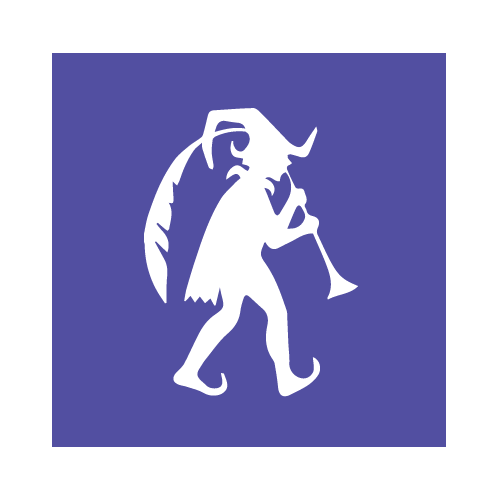

“필리리 피리리-“

피리부는 사나이가 마을의 어린이들을 데리고 떠났어요!

우리는 피리부는 사나이를 따라간 아이들을 구하기위해서 기본 정보를 파악하려해요.

피리부는 사나이를 따라간 어린이들 중 남자 어린이와 여자 어린이의 평균 연령을 표로 출력해보려고 합니다.

In [81]:
df = pd.read_csv("../data/the_pied_piper_of_hamelin.csv")

In [88]:
df.head()

,일차,구분,이름,나이,성별
0,1,Rat,Stevne,3,Male
1,1,Rat,Christopher,3,Male
2,1,Rat,Barbare,1,Female
3,1,Rat,Marie,1,Female
4,1,Rat,Elsapeth,1,Female


In [89]:
df.tail()

,일차,구분,이름,나이,성별
419,6,Child,Sissilie,13,Female
420,6,Child,Martha,8,Female
421,6,Child,Martha,6,Female
422,6,Child,Sampson,11,Male
423,6,Child,Florence,4,Female


In [90]:
df['구분'].unique()

array(['Rat', 'Child'], dtype=object)

해당 데이터이 구분 컬럼을 보면 Rat, Child 두가지 종류가 존재하는것을 알 수 있어요!
앞으로 우리는 마스킹연산을 통해 구분 값이 Child에 해당하는 데이터를 추출하겠습니다!

In [92]:
children = df[df['구분']=='Child']
children.head()

,일차,구분,이름,나이,성별
42,3,Child,Fayth,6,Female
43,3,Child,Dorthe,13,Female
44,3,Child,Rycherde,9,Male
103,4,Child,Grace,8,Female
104,4,Child,Beil,5,Female


In [100]:
# 일차별 평균 구하기!
children.groupby("일차").mean()

,나이
일차,
3,9.333333
4,8.000000
5,8.750000
6,8.733333


In [101]:
# 일차별 성별에 따른 나이의 평균을 구해보자!
children.pivot_table(index='일차', columns='성별', values='나이', aggfunc=np.mean)

성별,Female,Male
일차,,
3,9.500000,9.000000
4,9.000000,6.333333
5,8.666667,8.833333
6,9.411765,7.846154


In [104]:
# 끌려간 아이들의 이름을 뽑아보자!
# 한번이라도 끌려간 아이들을 중복없이 뽑아보자!

In [103]:
for name in children['이름'].unique():
    print(name)

Fayth
Dorthe
Rycherde
Grace
Beil
Katherine
Ranolde
Jaspar
Margreat
Gillian
Robarte
Marmaduke
Florence
Oswald
Ellinor
Mark
Katheryn
Francis
Marie
Margerye
Elsebell
Lamwell
Jeane
Gyeles
Sampson
Mary
Bartram
Umfraye
Gerard
Dorothye
Helen
Germayne
Andro
Hewghe
Harye
Symond
Julian
Meriall
Hellenor
Yssabell
Marke
Esabeth
Christofer
Jennat
Margret
Isabelle
Odnall
Jarrard
Cicell
Oswolde
Jan
Bessie
Jamys
Ralph
Elloner
Barbara
Martayn
Adam
Heugh
Elioner
Martine
Deane
An
Reginolde
Maryon
Tymothie
Elisabeth
Dorithy
Mathewe
Rebacca
Jaymes
Rauffe
Anne
Thomazin
Sissilie
Martha
